In [1]:
import numpy as np
from numpy import sqrt 
from numpy import pi
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import matplotlib.lines as mlines
import os
import seaborn as sns
from matplotlib.ticker import AutoLocator
from matplotlib.lines import Line2D
from PyAstronomy import pyasl
import numpy as np
import shutil
import os
%matplotlib inline
from astropy.io import ascii
import seaborn as sns
from matplotlib.ticker import MultipleLocator,FormatStrFormatter,MaxNLocator
from matplotlib.ticker import AutoMinorLocator
import matplotlib as mpl
from matplotlib.legend_handler import HandlerTuple
import matplotlib.lines as mlines
plt.rcParams['legend.frameon'] = False
from matplotlib.patches import Rectangle

In [5]:
sn1991bg='/Users/umutburgaz/ALL_SNe_CFA/sn1991bg_max.dat'
data1 = np.loadtxt(sn1991bg,dtype={'names': ('wl1', 'fl1'),'formats': ('f8', 'f8')} )
wl_1=data1['wl1']/(1+0.003045)
fl_1=data1['fl1']
fl_1_log = np.log10(fl_1/np.mean(fl_1))
#######################

sn2004gs='/Users/umutburgaz/ALL_SNe_CFA/sn2004gs_1d.dat'
data2 = np.loadtxt(sn2004gs,dtype={'names': ('wl2', 'fl2'),'formats': ('f8', 'f8')} )
wl_2=data2['wl2']/(1+0.0274)
fl_2=data2['fl2']
fl_2_log = np.log10(fl_2/np.mean(fl_2))
#######################

sn1986g_dered='/Users/umutburgaz/ALL_SNe_CFA/sn1986g_dereddened_peak.dat'
data9999 = np.loadtxt(sn1986g_dered,dtype={'names': ('wl9999', 'fl9999'),'formats': ('f8', 'f8')} )
wl_9999=data9999['wl9999']/(1+0.001825)
fl_9999=data9999['fl9999']
fl_9999_log = np.log10(fl_9999/np.mean(fl_9999))
#######################

sn2011fe='/Users/umutburgaz/ALL_SNe_CFA/11fe_peak.dat'
data4 = np.loadtxt(sn2011fe,dtype={'names': ('wl4', 'fl4'),'formats': ('f8', 'f8')} )
wl_4=data4['wl4']/(1+0.000804)
fl_4=data4['fl4']
fl_4_log = np.log10(fl_4/np.mean(fl_4))

/Users/umutburgaz/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in log10
  if sys.path[0] == '':


In [6]:
def process_data(name, ebv, z):
    sn_file = f'/Users/umutburgaz/ztfcosmoidr-main/dr2/spectra/{name}'
    data = np.loadtxt(sn_file, dtype={'names': ('wl', 'fl'), 'formats': ('f8', 'f8')})
    wl = data['wl']
    fl = data['fl']

    fluxUnred = pyasl.unred(wl, fl, ebv=ebv, R_V=3.1)

    output_file = f'/Users/umutburgaz/ZTFWork/just_for_comp_MW_dereddened/{name}'

    np.savetxt(output_file, np.column_stack((wl, fluxUnred)), delimiter=' ', fmt='%g')

    SN_obj = f'/Users/umutburgaz/ZTFWork/just_for_comp_MW_dereddened/{name}'

    data_obj = np.loadtxt(SN_obj, dtype={'names': ('wlobj', 'flobj'), 'formats': ('f8', 'f8')})
    wl_obj = data_obj['wlobj'] / (1 + z)
    fl_obj = data_obj['flobj']

    fl_obj_log = np.log10(fl_obj / np.mean(fl_obj))

    sns.set_style("ticks")
    sns.set_context("paper", font_scale=1.5)

    fig, ax = plt.subplots(figsize=(3.54, 3.54), dpi=600)

    for axis in ['top', 'bottom', 'left', 'right']:
        plt.gca().spines[axis].set_linewidth(2)

    plt.gca().xaxis.set_minor_locator(AutoMinorLocator())
    plt.gca().yaxis.set_minor_locator(AutoMinorLocator())

    y_series2 = pd.Series(fl_obj_log)
    window_size = 1
    y_smooth2 = y_series2.rolling(window=window_size, center=True).mean()

    sns.lineplot(x=wl_4, y=(fl_4_log - 0.4), linestyle='-', linewidth=1, ax=ax, color='tab:blue', label='11fe')
    sns.lineplot(x=wl_obj, y=(y_smooth2 - 0.4), ls='-', lw=1, ax=ax, alpha=0.5, color='grey', label='')

    sns.lineplot(x=wl_1, y=(fl_1_log - 1.2), linestyle='-', linewidth=1, ax=ax, color='green', label='91bg')
    sns.lineplot(x=wl_obj, y=(y_smooth2 - 1.2), ls='-', lw=1, ax=ax, alpha=0.5, color='grey', label='')

    sns.lineplot(x=wl_9999, y=(fl_9999_log - 2.4), linestyle='-', linewidth=1, ax=ax, color='pink', label='86G')
    sns.lineplot(x=wl_obj, y=(y_smooth2 - 2.5), ls='-', lw=1, ax=ax, alpha=0.5, color='grey', label='')

    sns.lineplot(x=wl_2, y=(fl_2_log - 3.6), linestyle='-', linewidth=1, ax=ax, color='m', label='04gs')
    sns.lineplot(x=wl_obj, y=(y_smooth2 - 3.6), ls='-', lw=1, ax=ax, alpha=0.5, color='grey', label='')

#     sns.lineplot(x=wl_44444, y=(fl_2010ops+0.85), linestyle='-', linewidth=1, ax=ax, color='red', label ='02es')
#     sns.lineplot(x=wl_obj, y=(y_smooth2+0.1), ls='-', lw=1, ax=ax, alpha=0.5, color='k', label ='')

    ax.set_xlabel('Rest Wavelength')
    ax.set_ylabel('log(F)+c')
    ax.set_xlim(3700, 8700)
    ax.set_ylim(-5, 0.5)

    ax.set_yticks([], minor=False)
    ax.minorticks_on()

    textstr = '11fe'
    plt.figtext(0.84, 0.85, textstr, c='tab:blue', fontsize=7)

    textstr1 = '91bg'
    plt.figtext(0.77, 0.85, textstr1, c='tab:green', fontsize=7)

    textstr2 = '86G'
    plt.figtext(0.70, 0.85, textstr2, c='pink', fontsize=7)

    textstr3 = '04gs'
    plt.figtext(0.62, 0.85, textstr3, c='m', fontsize=7)

    ax.yaxis.set_minor_locator(plt.NullLocator())

    ax.legend().set_visible(False)

    plt.savefig(f'/Users/umutburgaz/ZTFWork/just_for_comp_MW_dereddened/{name}.pdf',
                bbox_inches='tight')
    plt.show()

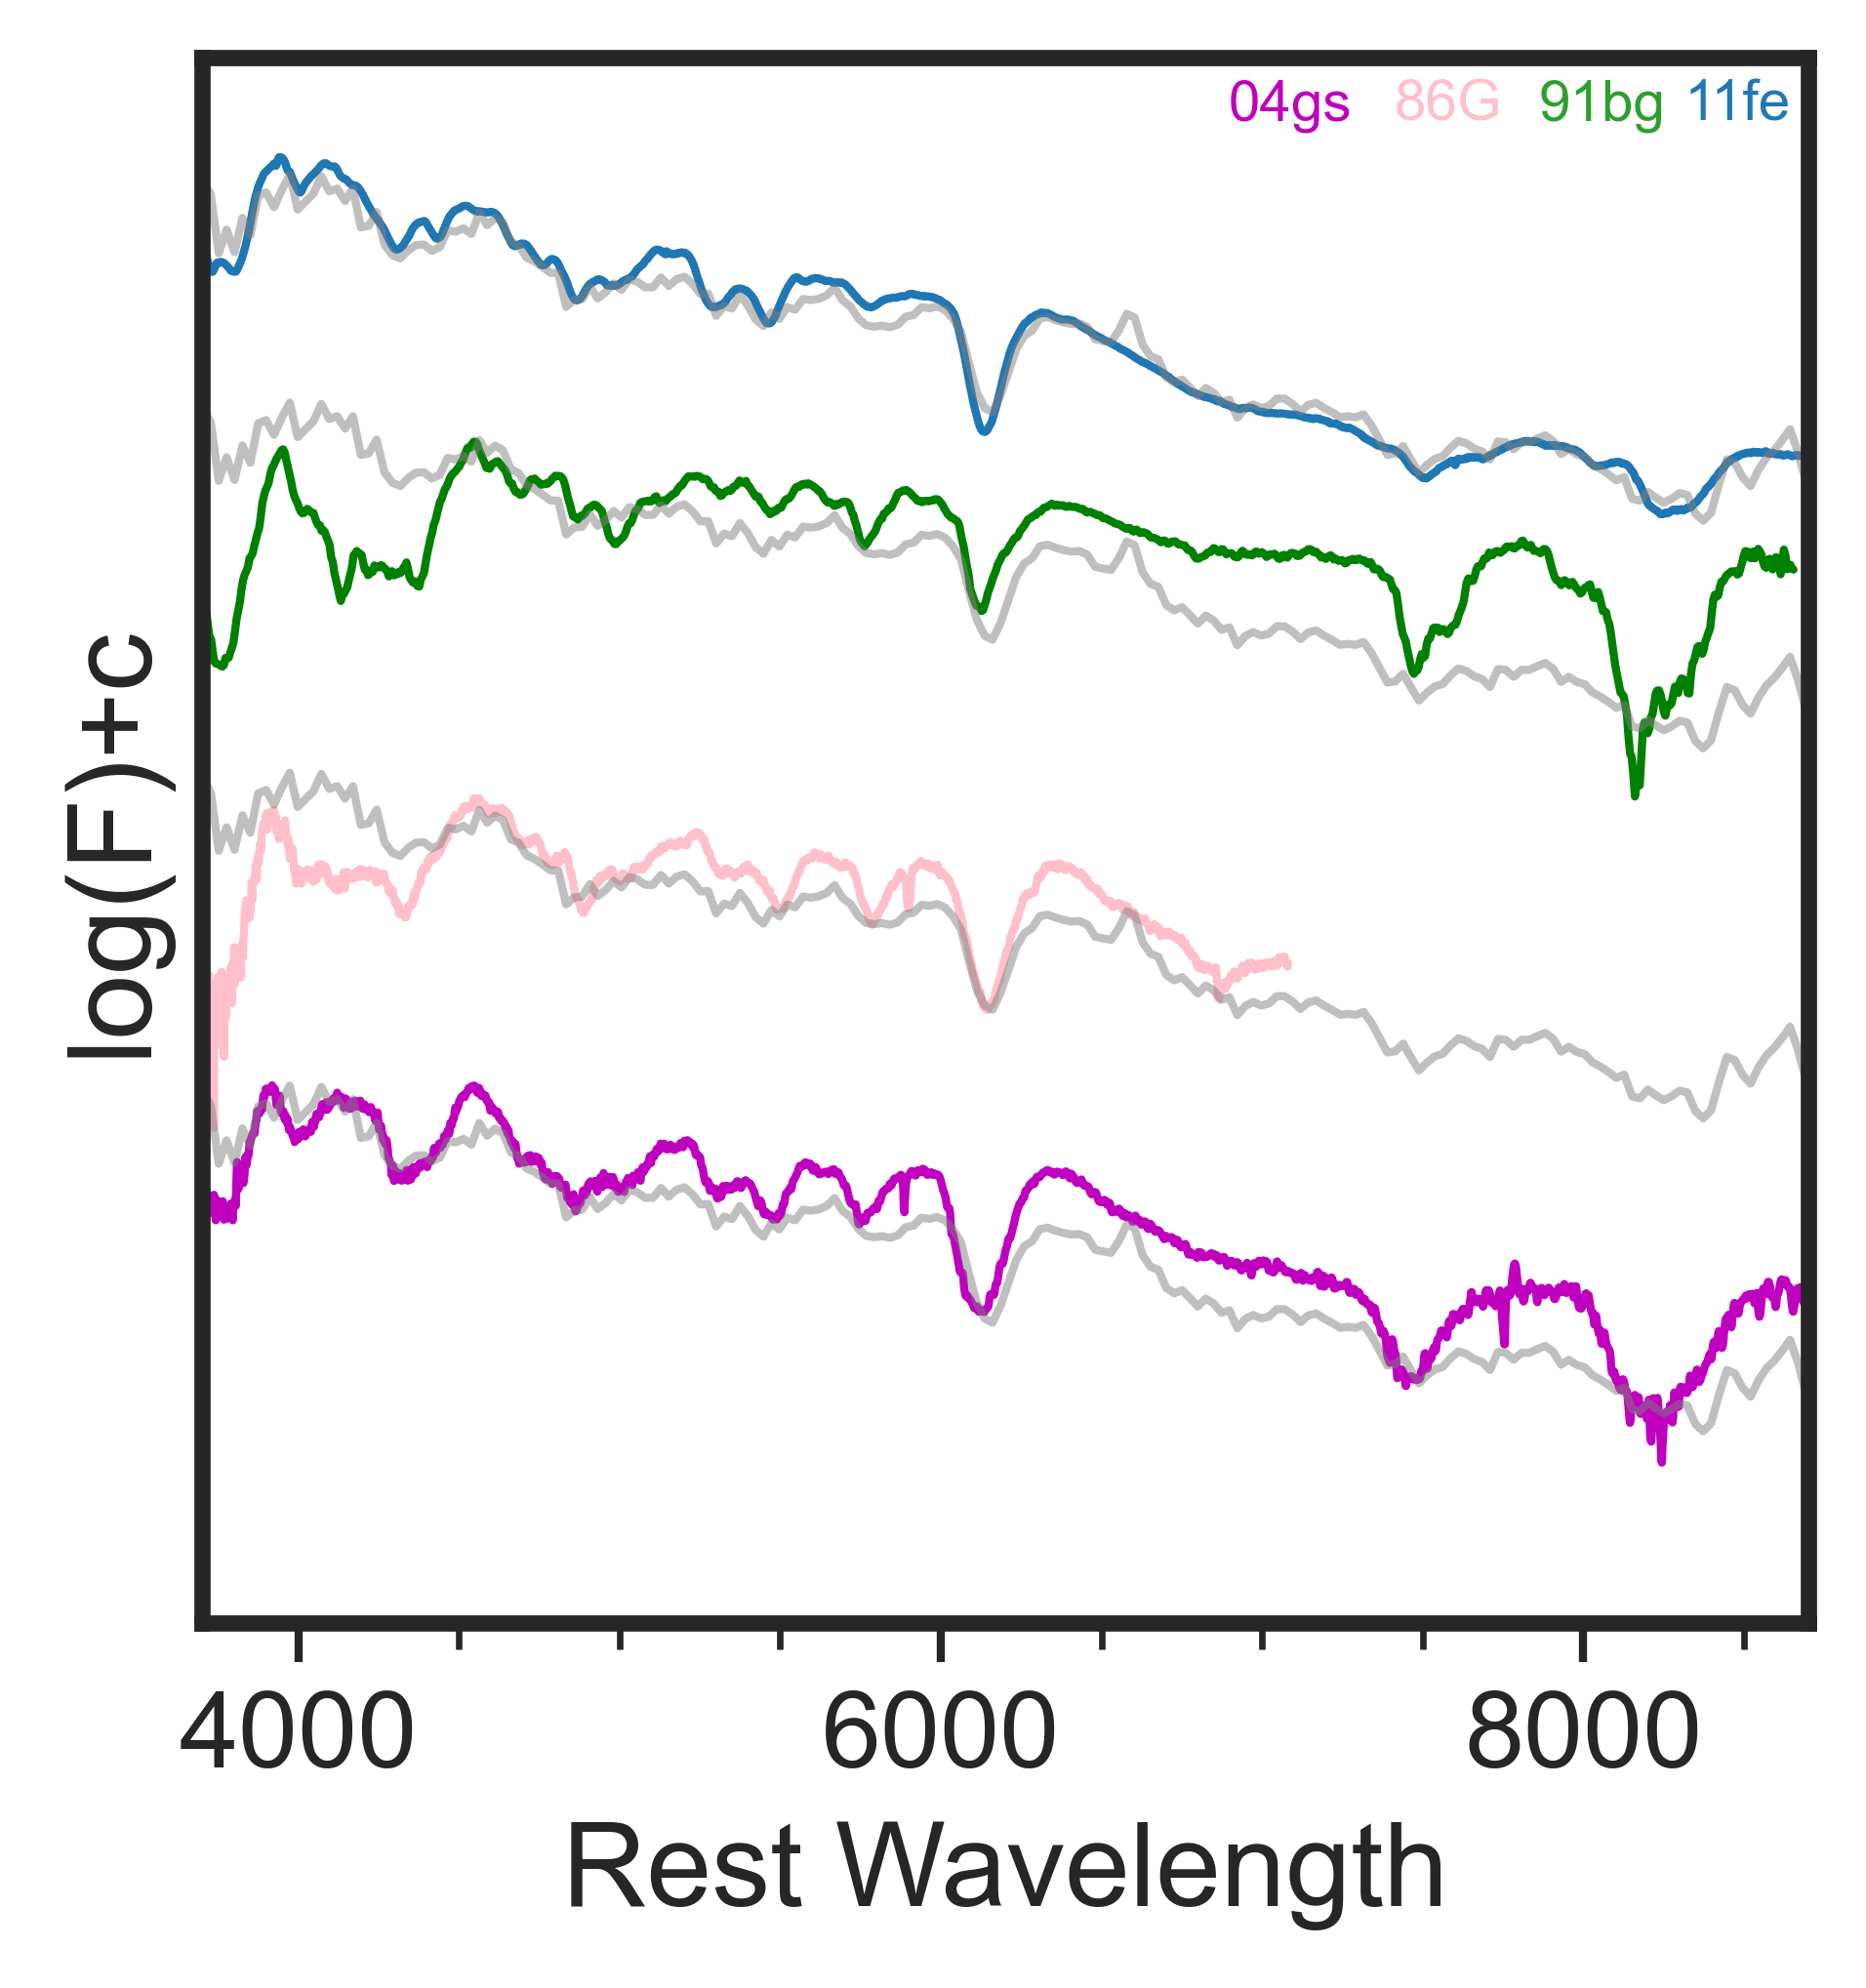

In [7]:
just_to_get_spec_name = '/Users/umutburgaz/ztfcosmoidr-main/dr2/spectra/ZTF20acordqz_20201112_SEDm_0.ascii'
name = 'ZTF20acordqz_20201112_SEDm_0.ascii'
ebv = 0.4
z = 0.04051586

process_data(name, ebv, z)